In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
file=pd.read_csv("headbrain.csv")

In [120]:
file

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [121]:
file["Head Size(cm^3)"]

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64

In [122]:
file["Brain Weight(grams)"]

0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64

In [123]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [124]:
file.isna().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [125]:
file.shape[0]

237

# splitting the data to train and test the model


In [126]:
train_input=np.array(file["Head Size(cm^3)"][:200]).reshape(200,1)
train_output=np.array(file["Brain Weight(grams)"][:200]).reshape(200,1)

test_input=np.array(file["Head Size(cm^3)"][200:]).reshape(37,1)
test_output=np.array(file["Brain Weight(grams)"][200:]).reshape(37,1)

In [127]:
train_input

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177],
       [3585],
       [3785],
       [3559],
       [3613],
       [3982],
       [3443],
       [3993],
       [3640],
       [4208],
       [3832],
       [3876],
       [3497],
       [3466],
       [3095],
       [4424],
       [3878],
       [4046],
       [3804],
       [3710],
       [4747],
       [4423],
       [4036],
       [4022],
       [3454],
       [4175],
       [3787],
       [3796],
       [4103],
       [4161],
       [4158],
       [3814],
       [3527],
       [3748],
       [3334],
       [3492],
       [3962],
       [3505],
       [4315],
       [3804],
       [3863],
       [4034],
       [4308],
       [3165],
       [3641],
       [3644],
       [3891],
       [3793],
       [4270],
       [4063],
       [4012],
       [3458],
       [3890],
       [4166],
       [3935],
       [3669],
       [3866],
       [3393],
       [4442],
       [4253],
       [3727],
       [3329],
       [34

In [128]:
train_output.shape

(200, 1)

In [129]:
test_input.shape

(37, 1)

In [130]:
test_input.size

37

In [131]:
train_input.ndim

2

In [132]:
train_input[0]

array([4512], dtype=int64)

# funtion to predict

y_predict=wx+b

# cost funtion 

In [133]:
def predict(train_input,w,b):
    predictions=np.zeros(train_input.shape)
    for i in range(train_input.size):
        predictions[i]=np.multiply(w,train_input[i])+b
    return predictions
    

In [134]:
def cost_funtion(train_output,predictions):
    cost=np.mean((predictions-train_output)**2)*0.5
    return cost
   
    


\
# Gradient descent


## partial derivatives of costfuntion w.r.t parameters w and b

update paremeters

In [135]:
def update_parameters(w,b,train_input,train_output,predictions,learning_rate):
    dw=np.mean((predictions-train_output)*train_input)
    db=np.mean(predictions-train_output)
    w=w-(learning_rate*dw)
    b=b-(learning_rate*db)
    return w,b

    

# Train data

In [170]:
def train_model(train_input,train_output,learning_rate,iterations):
    w=0
    b=0
    loss=[]
    for i in range(iterations):
        predictions=predict(train_input,w,b)
        cost=cost_funtion(train_output,predictions)
        loss.append(cost)
        
        if i%10==0:
            plt.figure(figsize=(10,6))
            plt.plot(train_input,train_output,"*",color="blue",label="actual data")
            plt.plot(train_input,predictions,"x",color="red" ,label="predicted data")
            plt.legend()
            plt.title(str(i)+"th model")
            plt.show()
        
        w,b=update_parameters(w,b,train_input,train_output,predictions,learning_rate)
        accuracy=100-np.abs(np.mean(predictions-train_output))
    return w,b,loss,accuracy

In [171]:
learning_rate=0.00000005
iters=70

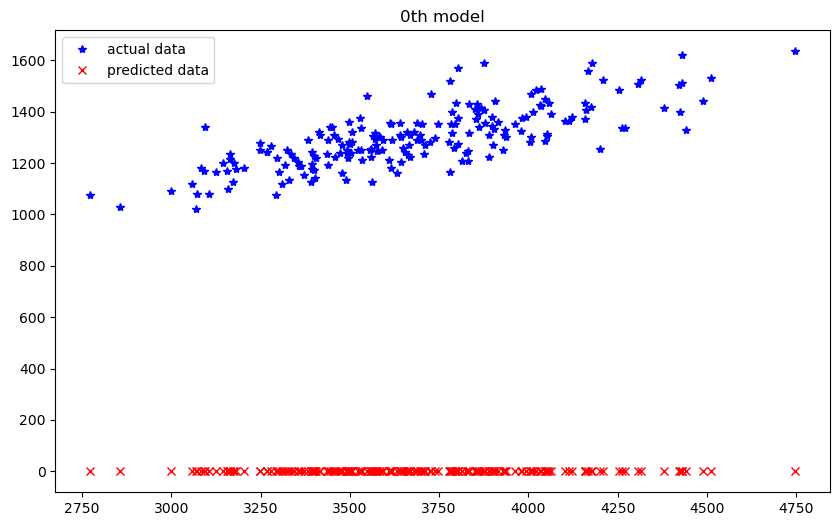

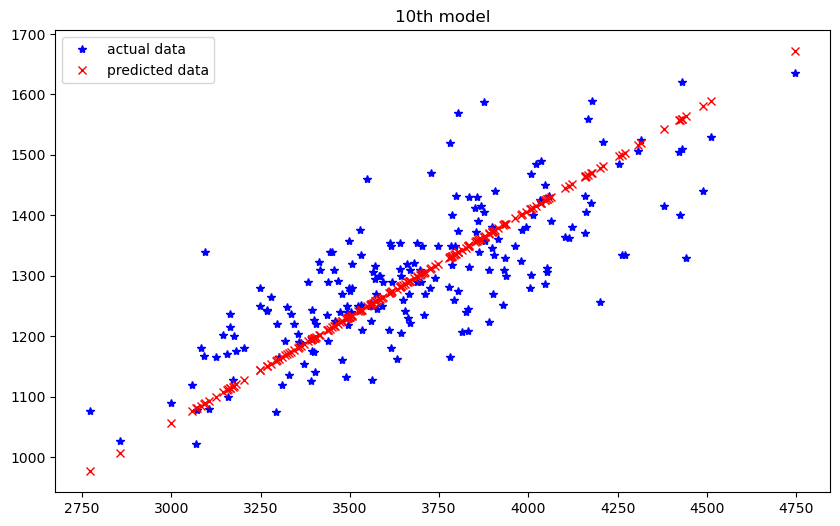

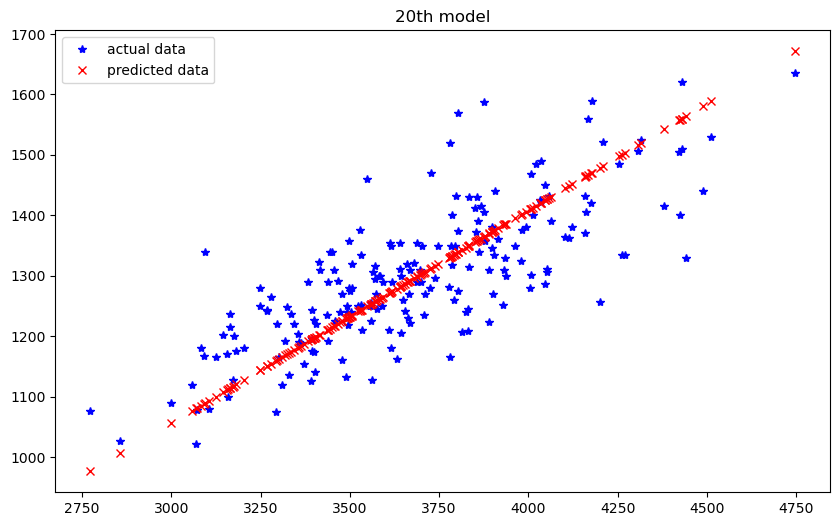

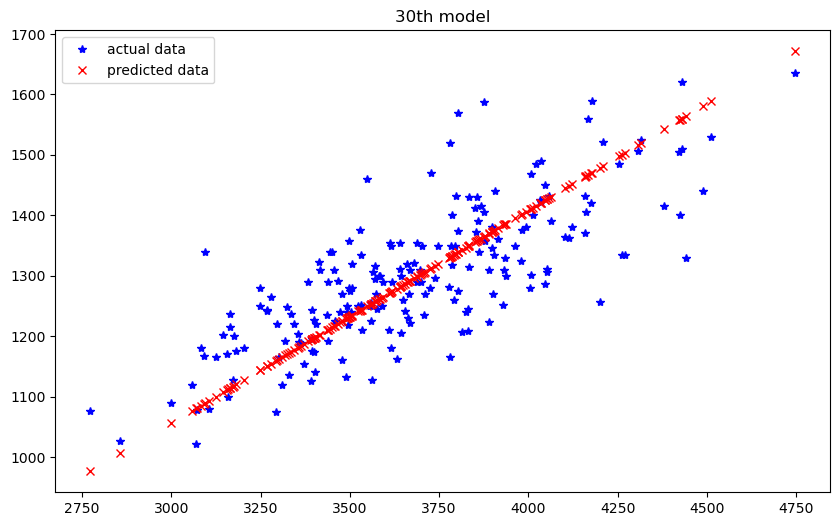

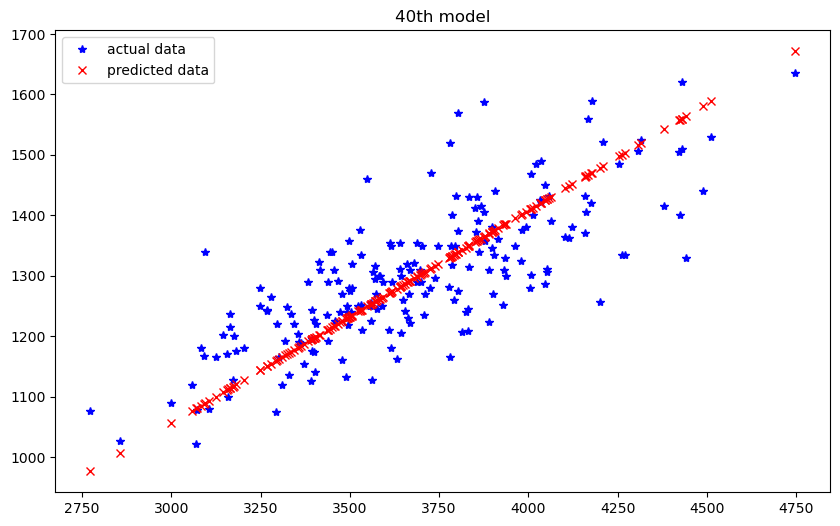

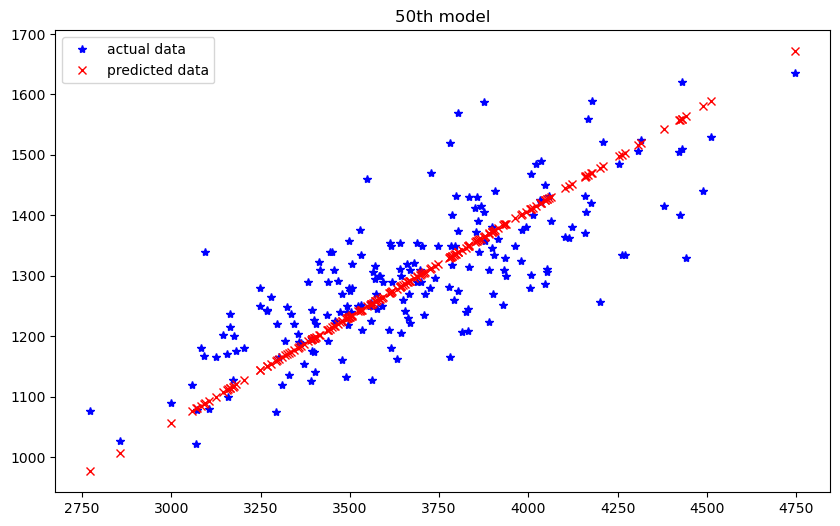

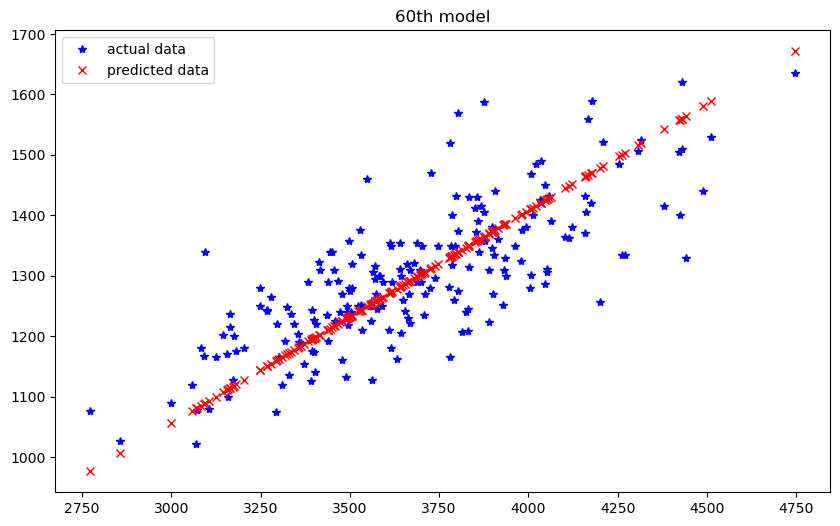

In [172]:
w,b,loss,accuracy=train_model(train_input,train_output,learning_rate,iters)

In [165]:
np.sum(loss)/train_input.size

5875.962327270493

In [166]:
w

0.3521153495614732

In [167]:
b

0.00010706617460362618

In [168]:
loss

[850315.16,
 88381.8346329499,
 11877.366406804656,
 4195.678962403921,
 3424.373398173066,
 3346.927878354236,
 3339.151700921969,
 3338.3709072240254,
 3338.2925084664403,
 3338.2846360260637,
 3338.283845016849,
 3338.2837650424544,
 3338.283756461895,
 3338.2837550498716,
 3338.283754357628,
 3338.283753737658,
 3338.2837531249447,
 3338.2837525129603,
 3338.2837519010473,
 3338.2837512891424,
 3338.2837506772385,
 3338.283750065335,
 3338.283749453432,
 3338.283748841527,
 3338.283748229623,
 3338.283747617719,
 3338.2837470058153,
 3338.283746393912,
 3338.283745782008,
 3338.2837451701052,
 3338.283744558201,
 3338.283743946297,
 3338.283743334393,
 3338.2837427224895,
 3338.2837421105855,
 3338.283741498682,
 3338.2837408867786,
 3338.2837402748746,
 3338.2837396629707,
 3338.2837390510667,
 3338.2837384391632,
 3338.283737827259,
 3338.2837372153554,
 3338.2837366034523,
 3338.2837359915475,
 3338.283735379645,
 3338.283734767741,
 3338.283734155836,
 3338.2837335439335,
 3338

In [173]:
accuracy

96.50170405487458